### The goal of this exercise is to study trends of shot types across the 4 quarters of an NBA game and try to identify if the percentage of each shot type varies over the course of the game

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
full_data = pd.read_csv('~/Downloads/NBA Shot Locations 1997 - 2020.csv')

/Users/anirudhkaranam/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
full_data

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729507,41800406,366,2738,Andre Iguodala,1610612744,Golden State Warriors,3,7,51,Pullup Jump shot,...,Right Side Center(RC),16-24 ft.,17,135,107,0,20190613,GSW,TOR,Playoffs
4729508,41800406,392,2738,Andre Iguodala,1610612744,Golden State Warriors,3,6,8,Jump Shot,...,Right Side(R),24+ ft.,23,228,37,1,20190613,GSW,TOR,Playoffs
4729509,41800406,404,2738,Andre Iguodala,1610612744,Golden State Warriors,3,4,41,Floating Jump shot,...,Center(C),Less Than 8 ft.,4,38,21,1,20190613,GSW,TOR,Playoffs
4729510,41800406,468,2738,Andre Iguodala,1610612744,Golden State Warriors,3,1,7,Jump Shot,...,Right Side Center(RC),24+ ft.,26,156,217,1,20190613,GSW,TOR,Playoffs


In [6]:
np.unique(full_data['Action Type'])

array(['Alley Oop Dunk Shot', 'Alley Oop Layup shot', 'Cutting Dunk Shot',
       'Cutting Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Driving Bank Hook Shot', 'Driving Bank shot', 'Driving Dunk Shot',
       'Driving Finger Roll Layup Shot', 'Driving Finger Roll Shot',
       'Driving Floating Bank Jump Shot', 'Driving Floating Jump Shot',
       'Driving Hook Shot', 'Driving Jump shot', 'Driving Layup Shot',
       'Driving Reverse Dunk Shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Dunk Shot', 'Fadeaway Bank shot',
       'Fadeaway Jump Shot', 'Finger Roll Layup Shot', 'Finger Roll Shot',
       'Floating Jump shot', 'Follow Up Dunk Shot', 'Hook Bank Shot',
       'Hook Shot', 'Jump Bank Hook Shot', 'Jump Bank Shot',
       'Jump Hook Shot', 'Jump Shot', 'Layup Shot', 'No Shot',
       'Pullup Bank shot', 'Pullup Jump shot', 'Putback Dunk Shot',
       'Putback Layup Shot', 'Putback Reverse Dunk Shot',
       'Putback Slam Dunk Shot', 'Reverse Dunk

In [7]:
import pandas as pd

# Assuming your DataFrame is named df and has columns 'Player Name' and 'Action Type'
# df = pd.read_csv('your_shot_logs.csv')

# Group by 'Player Name' and 'Action Type', then count occurrences
action_counts = full_data.groupby(['Player Name', 'Action Type']).size().reset_index(name='Count')

# Find the most common action type for each player
most_common_actions = action_counts.loc[action_counts.groupby('Player Name')['Count'].idxmax()]

# Rename columns for clarity
most_common_actions = most_common_actions.rename(columns={'Action Type': 'Most Common Action Type', 'Count': 'Action Count'})

# Display the resulting DataFrame
# print(most_common_actions)
most_common_actions

,Player Name,Most Common Action Type,Action Count
4,A.C. Green,Jump Shot,1057
15,A.J. Bramlett,Layup Shot,8
20,A.J. Guyton,Jump Shot,385
32,AJ Hammons,Jump Shot,27
49,AJ Price,Jump Shot,1145
...,...,...,...
50561,Zion Williamson,Layup Shot,63
50578,Zoran Dragic,Jump Shot,16
50590,Zoran Planinic,Jump Shot,258
50613,Zydrunas Ilgauskas,Jump Shot,4181


In [8]:
full_data.columns

Index(['Game ID', 'Game Event ID', 'Player ID', 'Player Name', 'Team ID',
       'Team Name', 'Period', 'Minutes Remaining', 'Seconds Remaining',
       'Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area',
       'Shot Zone Range', 'Shot Distance', 'X Location', 'Y Location',
       'Shot Made Flag', 'Game Date', 'Home Team', 'Away Team', 'Season Type'],
      dtype='object')

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming full_data is your DataFrame
# Sample DataFrame for demonstration purposes
# full_data = pd.read_csv('your_shot_logs.csv')

# Group by 'Period' and 'Action Type', then count occurrences
period_action_counts = full_data.groupby(['Period', 'Action Type']).size().reset_index(name='Count')

# Find the most common action type for each period
most_common_actions_period = period_action_counts.loc[period_action_counts.groupby('Period')['Count'].idxmax()]

most_common_actions_period = most_common_actions_period.sort_values(by='Period', ascending=True).head(4)
most_common_actions_period

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.bar(most_common_actions_period['Period'].astype(str), most_common_actions_period['Count'], color='blue')
# plt.xlabel('Period')
# plt.ylabel('Most Common Action Type')
# plt.title('Most Common Action Type for Each Period')
# plt.xticks(most_common_actions_period['Period'].astype(str))
# plt.show()


,Period,Action Type,Count
30,1,Jump Shot,663359
100,2,Jump Shot,629535
170,3,Jump Shot,636366
239,4,Jump Shot,621765


In [11]:
np.unique(full_data['Period'])

array([1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
full_data[full_data['Period'] == 8]

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
26484,29700110,675,1509,Kelvin Cato,1610612757,Portland Trail Blazers,8,3,35,Tip Shot,...,Center(C),Less Than 8 ft.,0,0,0,1,19971114,POR,PHX,Regular Season
39267,29700110,692,180,John Crotty,1610612757,Portland Trail Blazers,8,1,50,Jump Shot,...,Center(C),8-16 ft.,8,-31,78,0,19971114,POR,PHX,Regular Season
39268,29700110,719,180,John Crotty,1610612757,Portland Trail Blazers,8,0,7,Jump Shot,...,Right Side Center(RC),16-24 ft.,21,114,179,0,19971114,POR,PHX,Regular Season
66875,29700110,674,278,Stacey Augmon,1610612757,Portland Trail Blazers,8,3,36,Jump Shot,...,Center(C),Less Than 8 ft.,1,-18,4,0,19971114,POR,PHX,Regular Season
66876,29700110,700,278,Stacey Augmon,1610612757,Portland Trail Blazers,8,0,57,Jump Shot,...,Right Side(R),16-24 ft.,16,149,62,1,19971114,POR,PHX,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727260,41800233,833,203468,CJ McCollum,1610612757,Portland Trail Blazers,8,2,26,Driving Layup Shot,...,Center(C),Less Than 8 ft.,2,17,13,0,20190503,POR,DEN,Playoffs
4727261,41800233,862,203468,CJ McCollum,1610612757,Portland Trail Blazers,8,0,23,Step Back Jump shot,...,Left Side Center(LC),16-24 ft.,16,-87,140,0,20190503,POR,DEN,Playoffs
4728370,41800233,847,203918,Rodney Hood,1610612757,Portland Trail Blazers,8,1,7,Pullup Jump shot,...,Center(C),8-16 ft.,13,-43,130,1,20190503,POR,DEN,Playoffs
4728371,41800233,857,203918,Rodney Hood,1610612757,Portland Trail Blazers,8,0,44,Pullup Jump shot,...,Right Side(R),8-16 ft.,11,119,4,1,20190503,POR,DEN,Playoffs


In [22]:
period_action_counts = full_data.groupby(['Period', 'Action Type']).size().reset_index(name='Count')

period_action_counts

,Period,Action Type,Count
0,1,Alley Oop Dunk Shot,6757
1,1,Alley Oop Layup shot,3812
2,1,Cutting Dunk Shot,3448
3,1,Cutting Finger Roll Layup Shot,705
4,1,Cutting Layup Shot,6330
...,...,...,...
456,8,Step Back Jump shot,7
457,8,Tip Dunk Shot,2
458,8,Tip Layup Shot,1
459,8,Tip Shot,1


In [23]:
np.unique(period_action_counts['Action Type'])

array(['Alley Oop Dunk Shot', 'Alley Oop Layup shot', 'Cutting Dunk Shot',
       'Cutting Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Driving Bank Hook Shot', 'Driving Bank shot', 'Driving Dunk Shot',
       'Driving Finger Roll Layup Shot', 'Driving Finger Roll Shot',
       'Driving Floating Bank Jump Shot', 'Driving Floating Jump Shot',
       'Driving Hook Shot', 'Driving Jump shot', 'Driving Layup Shot',
       'Driving Reverse Dunk Shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Dunk Shot', 'Fadeaway Bank shot',
       'Fadeaway Jump Shot', 'Finger Roll Layup Shot', 'Finger Roll Shot',
       'Floating Jump shot', 'Follow Up Dunk Shot', 'Hook Bank Shot',
       'Hook Shot', 'Jump Bank Hook Shot', 'Jump Bank Shot',
       'Jump Hook Shot', 'Jump Shot', 'Layup Shot', 'No Shot',
       'Pullup Bank shot', 'Pullup Jump shot', 'Putback Dunk Shot',
       'Putback Layup Shot', 'Putback Reverse Dunk Shot',
       'Putback Slam Dunk Shot', 'Reverse Dunk

In [24]:
action_counts = full_data.groupby(['Action Type']).size().reset_index(name='Count')

In [26]:
action_counts.sort_values(by='Count', ascending=False, inplace=True)

In [27]:
action_counts

,Action Type,Count
30,Jump Shot,2570552
31,Layup Shot,609190
14,Driving Layup Shot,293150
34,Pullup Jump shot,137984
26,Hook Shot,91485
...,...,...
15,Driving Reverse Dunk Shot,217
44,Running Bank Hook Shot,187
67,Turnaround Finger Roll Shot,127
53,Running Reverse Dunk Shot,102


In [28]:
top5shots = action_counts.head(5)

In [29]:
top5shots

,Action Type,Count
30,Jump Shot,2570552
31,Layup Shot,609190
14,Driving Layup Shot,293150
34,Pullup Jump shot,137984
26,Hook Shot,91485


In [32]:
import pandas as pd

# Assuming full_data is your DataFrame
# Sample DataFrame for demonstration purposes
# full_data = pd.read_csv('path_to_your_shot_logs.csv')

# Group by 'Period' and 'Action Type', then count occurrences
period_action_counts = full_data.groupby(['Period', 'Action Type']).size().reset_index(name='Count')

# Calculate the total number of shots for each period
total_shots_per_period = period_action_counts.groupby('Period')['Count'].sum().reset_index(name='TotalShots')

# Merge total shots with the original counts
period_action_counts = period_action_counts.merge(total_shots_per_period, on='Period')

# Calculate the percentage of each action type within each period
period_action_counts['Percentage'] = (period_action_counts['Count'] / period_action_counts['TotalShots']) * 100

period_action_counts = period_action_counts[period_action_counts['Period'] <= 4]

# Display the resulting DataFrame
period_action_counts


,Period,Action Type,Count,TotalShots,Percentage
0,1,Alley Oop Dunk Shot,6757,1241342,0.544330
1,1,Alley Oop Layup shot,3812,1241342,0.307087
2,1,Cutting Dunk Shot,3448,1241342,0.277764
3,1,Cutting Finger Roll Layup Shot,705,1241342,0.056793
4,1,Cutting Layup Shot,6330,1241342,0.509932
...,...,...,...,...,...
274,4,Turnaround Fadeaway Bank Jump Shot,412,1117611,0.036864
275,4,Turnaround Fadeaway shot,4346,1117611,0.388865
276,4,Turnaround Finger Roll Shot,27,1117611,0.002416
277,4,Turnaround Hook Shot,3897,1117611,0.348690


In [33]:
top_action_types_per_period = period_action_counts.sort_values(by=['Period', 'Count'], ascending=[True, False]).groupby('Period').head(4)

In [34]:
top_action_types_per_period

,Period,Action Type,Count,TotalShots,Percentage
30,1,Jump Shot,663359,1241342,53.438859
31,1,Layup Shot,159673,1241342,12.862934
14,1,Driving Layup Shot,74665,1241342,6.014861
34,1,Pullup Jump shot,37091,1241342,2.987976
100,2,Jump Shot,629535,1179133,53.389652
101,2,Layup Shot,157322,1179133,13.342176
84,2,Driving Layup Shot,74174,1179133,6.290554
104,2,Pullup Jump shot,34617,1179133,2.935801
170,3,Jump Shot,636366,1157160,54.993778
171,3,Layup Shot,148448,1157160,12.828649


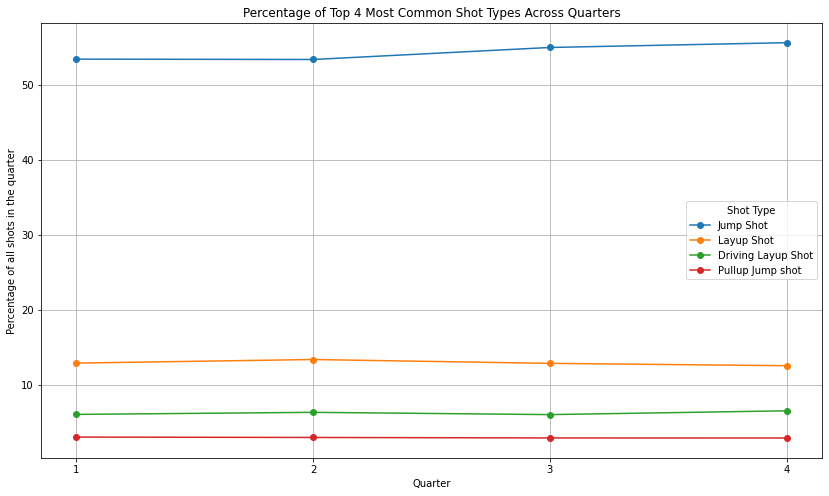

In [40]:
# Plot the results
plt.figure(figsize=(14, 8))

for action_type in top_action_types_per_period['Action Type'].unique():
    subset = top_action_types_per_period[top_action_types_per_period['Action Type'] == action_type]
    plt.plot(subset['Period'], subset['Percentage'], marker='o', label=action_type)

plt.xlabel('Quarter')
plt.ylabel('Percentage of all shots in the quarter')
plt.title('Percentage of Top 4 Most Common Shot Types Across Quarters')
plt.legend(title='Shot Type')
plt.grid(True)
plt.xticks(range(1, 5))  # Assuming periods 1 to 4
plt.show()

As you can see, the percentage of each shot type remains fairly consistent across quarters. Basically, teams do not make a significant difference in their approach in terms of shot types across quarters. We can infer that teams that tend to take a lot of jump shots tend to stick with their strategy throughout the game, while teams that mostly rely on an inside game (layups and dunks) tend to not deviate from their strategy towards the end of games.